In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import math
import random
import pickle

In [2]:
def plotBLOSUM(blosumArr,tickSep,labelsArr,title):
    plt.imshow(blosumArr,vmin=-10,vmax=10,cmap='bwr')
    plt.xticks(tickSep, labels=labelsArr)
    plt.yticks(tickSep, labels=labelsArr)
    #plt.title(title)
    plt.colorbar()
    plt.show()
    

def toroidal_distance(phi1, psi1, phi2, psi2, R=1):
    """
    Compute the distance between two points on a torus given by angular coordinates.

    Parameters:
    - phi1, theta1: Angular coordinates of point 1 (in radians)
    - phi2, theta2: Angular coordinates of point 2 (in radians)
    - R: Radius of the torus

    Returns:
    - Distance between the two points on the torus (float)
    """
    
    # Calculate differences in angular coordinates
    d_phi = abs(phi2 - phi1)
    d_psi = abs(psi2 - psi1)

    # Adjust differences due to toroidal periodicity
    if d_phi > math.pi:
        d_phi = 2 * math.pi - d_phi
    if d_psi > math.pi:
        d_psi = 2 * math.pi - d_psi

    # Calculate the distance using toroidal distance formula
    distance = R * math.sqrt(d_phi**2 + d_psi**2 - 2 * d_phi * d_psi * math.cos(math.pi / 2))

    return distance



def reorder_distance_matrix(distance_matrix):
    # Compute hierarchical clustering
    linkage_matrix = hierarchy.complete(distance_matrix)
    
    # Get the optimal leaf order
    optimal_order = hierarchy.leaves_list(linkage_matrix)

    # Reorder distance matrix based on the optimal leaf order
    reordered_matrix = distance_matrix[optimal_order, :]
    reordered_matrix = reordered_matrix[:, optimal_order]

    return reordered_matrix, optimal_order

In [3]:
tickSepRegularBLOSUM=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
clusterLabels=[i for i in range(20)]
blosumArr = np.load('/cluster/tufts/pettilab/shared/structure_comparison_data/alphabets/dihedral_blosum.npy')

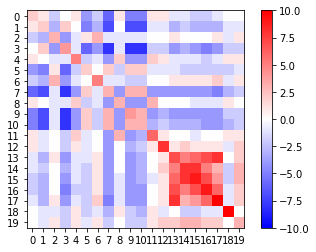

In [4]:
plotBLOSUM(blosumArr, tickSepRegularBLOSUM, clusterLabels, 'Dihedral BLOSUM')

In [5]:
#cluster dictionary
with open('/cluster/tufts/pettilab/shared/structure_comparison_data/dihedral/new_dict.txt','rb') as f:
    new_dict = pickle.load(f)

In [6]:
#distance matrix
mat_dist = [[0 for _ in range(18)] for _ in range(18)]
for source in range(0,18):
    i = []
    for k, v in new_dict.items():
        if v==source:
            i.append(k)
    
    for target in range(0,18):
        j = []
        for k, v in new_dict.items():
            if v==target:
                j.append(k)
    
        for ii in i:
            for jj in j:
                x1,y1=((2*np.pi)/60)-np.pi+ii[0]*(2*np.pi)/30, ((2*np.pi)/60)-np.pi+ii[1]*(2*np.pi)/30
                x2,y2=((2*np.pi)/60)-np.pi+jj[0]*(2*np.pi)/30, ((2*np.pi)/60)-np.pi+jj[1]*(2*np.pi)/30

                
                mat_dist[source][target] += toroidal_distance(x1,y1,x2,y2)

        mat_dist[source][target]=mat_dist[source][target]/(len(i)*len(j))

mat_dist = np.matrix(mat_dist)

In [7]:
#new re-ordered distance matrix. new order.
new_matrix, new_order = reorder_distance_matrix(np.array(mat_dist))

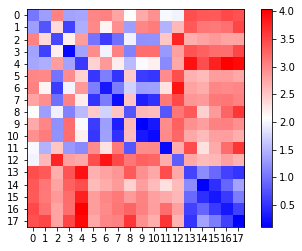

In [8]:
# distance matrix
plt.imshow(mat_dist,cmap='bwr')
plt.xticks(np.arange(len(mat_dist)))
plt.yticks(np.arange(len(mat_dist)))
plt.colorbar()  # Add colorbar for reference

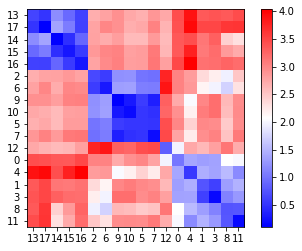

In [9]:
#re-ordered distance matrix plot
plt.imshow(new_matrix,cmap='bwr')
plt.xticks(np.arange(len(new_matrix)), new_order)
plt.yticks(np.arange(len(new_matrix)), new_order)
plt.colorbar()  # Add colorbar for reference
plt.show()

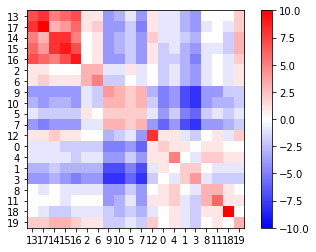

In [10]:
#get the blosum in the same order
new_order=np.append(new_order,[18,19]) #18 and 19 are not shuffled. adding after everything else is shuffled.
reordered_mat = blosumArr[:, new_order][new_order]

#plot
plt.imshow(np.matrix(reordered_mat),cmap='bwr',vmin=-10,vmax=10)
plt.xticks(np.arange(len(reordered_mat)), new_order)
plt.yticks(np.arange(len(reordered_mat)), new_order)
plt.colorbar()  # Add colorbar for reference
plt.show()


{13: 0, 17: 1, 14: 2, 15: 3, 16: 4, 2: 5, 6: 6, 9: 7, 10: 8, 5: 9, 7: 10, 12: 11, 0: 12, 4: 13, 1: 14, 3: 15, 8: 16, 11: 17, 18: 18, 19: 19}


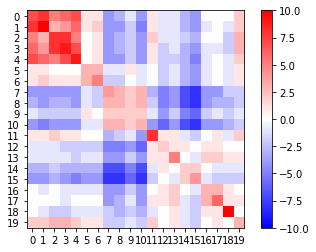

In [11]:
# relabel the new order (0-19)
newLabels={}
for ii , jj in enumerate(new_order):
    newLabels[jj] = ii
    
print(newLabels)
    
#blosum
plt.imshow(reordered_mat,cmap='bwr',vmin=-10,vmax=10)
plt.xticks(np.arange(len(reordered_mat)), newLabels.values())
plt.yticks(np.arange(len(reordered_mat)), newLabels.values())
plt.colorbar()  # Add colorbar for reference
plt.show()

In [ ]:
#Rama plots

In [12]:
DihedralVals = list(new_dict.keys())[:-2]

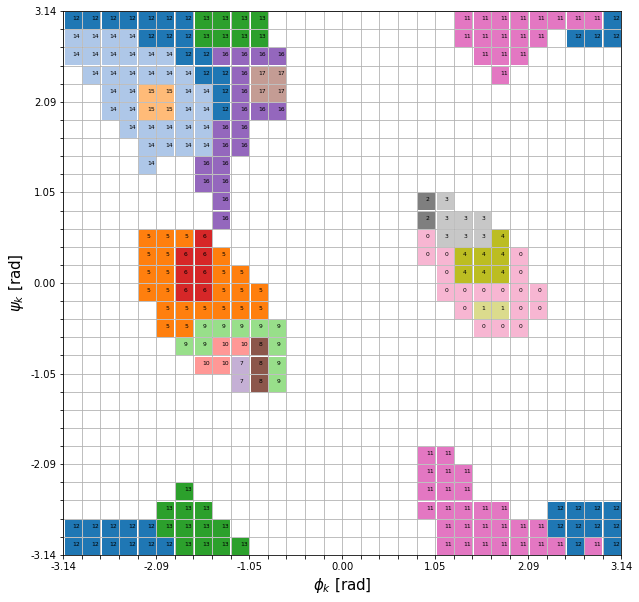

In [13]:
plt.figure(figsize=(10, 10))

plt.xlabel('$\phi_{k}$ [rad]',fontsize=15)
plt.ylabel('$\psi_k$ [rad]',fontsize=15)

# # Set the x and y axis scales to cover the full range of possible phi/psi values
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)

x=np.linspace(-np.pi,np.pi,30+1)#numberOfBins=30
y=x
plt.xticks(x)
plt.yticks(y)
xtick_labels = ['' for _ in x] # first create a list of empty strings
ytick_labels = ['' for _ in y] # for y-axis
xtick_labels[::5] = [f'{tick:.2f}' for tick in x[::5]] # now every fifth element is the respective tick value
ytick_labels[::5] = [f'{tick:.2f}' for tick in y[::5]] # for y-axis
plt.gca().set_xticklabels(xtick_labels,fontsize=10)
plt.gca().set_yticklabels(ytick_labels,fontsize=10)

for i in range(len(DihedralVals)):
    j = new_dict[DihedralVals[i]]
    x,y=((2*np.pi)/60)-np.pi+DihedralVals[i][0]*(2*np.pi)/30, ((2*np.pi)/60)-np.pi+DihedralVals[i][1]*(2*np.pi)/30
    plt.text(x,y,newLabels[new_dict[DihedralVals[i]]],fontsize=6)#relabelling
    plt.scatter(x,y,marker='s',s=240,color=plt.cm.tab20(j))


plt.grid(True)

(-3.141592653589793, 3.141592653589793)

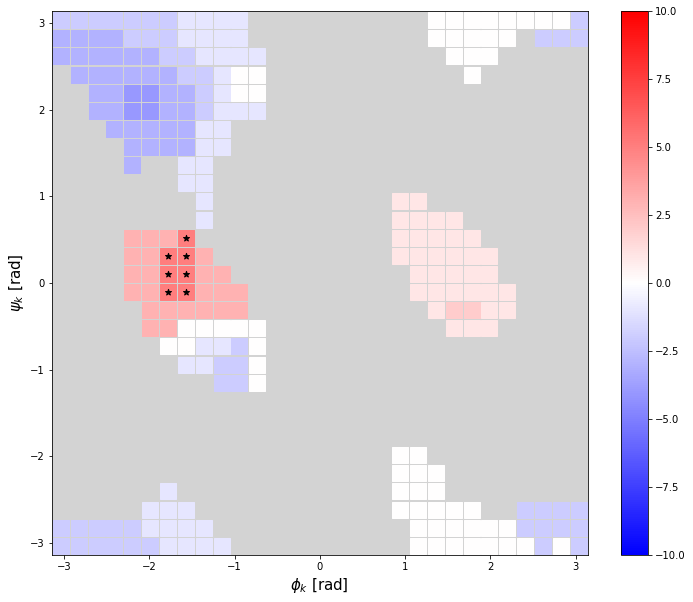

In [14]:
chosen_cluster = 6 #pick a cluster (new labels)

plt.figure(figsize=(12, 10))
ax = plt.axes()
ax.set_facecolor("lightgray")


for i in range(len(DihedralVals)):
    x,y=((2*np.pi)/60)-np.pi+DihedralVals[i][0]*(2*np.pi)/30, ((2*np.pi)/60)-np.pi+DihedralVals[i][1]*(2*np.pi)/30

    plt.scatter(x,y,marker='s',s=240,color='lightgray')
    


for j in range(len(DihedralVals)):
    x,y=((2*np.pi)/60)-np.pi+DihedralVals[j][0]*(2*np.pi)/30, ((2*np.pi)/60)-np.pi+DihedralVals[j][1]*(2*np.pi)/30
    z=reordered_mat[chosen_cluster,newLabels[new_dict[DihedralVals[j]]]]
    #print(z)
    plt.scatter(x,y,marker='s',cmap='bwr',s=240,c=z,vmin=-10,vmax=10)
    if (newLabels[new_dict[DihedralVals[j]]]==chosen_cluster):
        plt.scatter(x,y,marker='*',color='black',s=40)
plt.colorbar()

#plt.title("chosen cluster={}".format(chosen_cluster),fontsize=20)
plt.xlabel('$\phi_{k}$ [rad]',fontsize=15)
plt.ylabel('$\psi_k$ [rad]',fontsize=15)
#plt.colorbar()

# # Set the x and y axis scales to cover the full range of possible phi/psi values
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)